# IST736 Text Mining
## Homework 3 
### Martin Alonso
### 2019-01-31

For this assignment, I will be creating a text corpus based on the work of my friend Russell Carlton. With his permission, I have downloaded nine articles he has written over the past decade for the website Baseball Prospectus.  
The corpus will be created using the NLTK package and, after creation, I will vectorize the documents and explore any trends that may appear over his work.  

#### Loading the packages and creating the corpus
I'll first load the packages that will be used, starting with NLTK, Pandas, and Numpy. I'll also load Matplotlib and Seaborn for graphing the corpus. 

In [98]:
# Packages to be used.
import os
import nltk
from nltk.corpus import stopwords
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# Downloads nltk packages
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/martin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/martin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Now that the packages have been loaded, I'll use NLTK's PlaintextCorpusReader to load the text files into Python. Once these texts are loaded, a new corpus can be created using the nine documents. These can then be analyzed as words, sentences, paragraphs, or as a whole.  

In [5]:
# Designate the folder directory where the texts are located and load them into the notebook. 
# Sets the directory where the files are stored for easy acces. 
corpus_dir = 'Corpus/'

# Passes the files in the directory into a new corpus that can then be parsed and studied. 
new_corpus = PlaintextCorpusReader(corpus_dir, '*.txt')

In [22]:
# Creates an array where the file names are stored for easy access. 
texts = []
for file in os.listdir(corpus_dir):
    texts.append(file)
    
print(texts)

['Russel2.txt', 'Russel4.txt', 'Russel1.txt', 'Russel9.txt', 'Russel6.txt', 'Russel8.txt', 'Russel3.txt', 'Russel7.txt', 'Russel5.txt']


In [54]:
# Creates two empty arrays that will store word counts and words for each text in the corpora. 
word_counts = []
word_corpus = []

# Iterates over every item in the texts array to print the word count of each text in the corpora. 
for file in texts:
    file_length = len(new_corpus.words(file))
    words = new_corpus.words(file)
    word_counts.append(file_length)
    word_corpus = np.concatenate([word_corpus, words]) # Word corpus needs to be concatenated, otherwise a list is created. 
    print(file, ': %d' % file_length)
    
# Prints the average number of words across the corpora. 
print('Avg Word Count: %d' % np.mean(word_counts))
print('Total Word Count: %d' % len(word_corpus))

Russel2.txt : 2328
Russel4.txt : 2276
Russel1.txt : 1496
Russel9.txt : 1784
Russel6.txt : 1847
Russel8.txt : 4438
Russel3.txt : 960
Russel7.txt : 4430
Russel5.txt : 2537
Avg Word Count: 2455
Total Word Count: 22096


A few interesting things to note before we move on. First off, there are over 22,000 words in these nine documents, including stop words. The average number of words is 2,455, though the data set may be slightly skewed on account of there being to texts with word counts over 4,400. The smallest, or briefest, text has only 960 words.  

Now that the documents have been loaded, the corpus has been created and we know how many words there are in total, we can begin to analyze the corpus. First of, English stop words will be removed; after that, the remaining words in the corpus will be vectorized and stemmed.  
To begin, let's check the list of the most common words in the corpus. 

the : 1089
a : 526
to : 503
that : 477
of : 418
and : 314
in : 304
it : 268
is : 216
s : 210
for : 205
i : 188
we : 165
but : 150
on : 145
you : 145
t : 118
at : 117
be : 115
there : 113


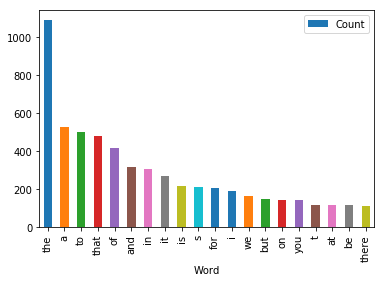

In [95]:
# Initialize a dictionary. 
wordcount = {}

# Iterate over the word corpus to remove special characters that may muddy the data. 
for word in word_corpus:
    word = re.sub('[\W\_]', '', word).lower()
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1

# Because special characters have been replaced with '', '' will need to be removed from the wordcount
# dictionary so as to not skew the data.
wordcount.pop('', None)

# Print the 20 most common words. 
n_print = 20            
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": %d" % count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

Of course, this is cheating. No stop words have been removed from the data set, skewing the corpus word frequency. 'The' is used over one thousand times across the entire corpus, along with 'a', 'to', 'that', and so forth. If we were to remove stop words from this dictionary, the term frequency would be vastly different. Let's check word frequency after removing stop words. 

would : 75
game : 69
shift : 69
first : 65
time : 64
one : 60
players : 58
get : 51
games : 49
might : 48
balls : 46
5 : 44
baseball : 43
going : 41
1 : 41
ball : 41
play : 40
see : 39
even : 38
two : 37
way : 37
like : 37
left : 36
make : 35
little : 35


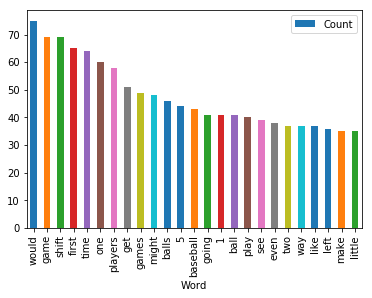

In [101]:
# Initiate English stop words
stop = stopwords.words('english')

wordcount2 = wordcount

for s in stop: 
    wordcount2.pop(s, None)
    
# Print the 20 most common words. 
n_print = 25         
word_counter = collections.Counter(wordcount2)
for word, count in word_counter.most_common(n_print):
    print(word, ": %d" % count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')


In [56]:
# Initialize vectorizer.
vectorizer = TfidfVectorizer()
responses = []
for file in texts:
    text = new_corpus.words(file)
    response = vectorizer.fit_transform(text)
    responses.append(response)

In [57]:
print(responses)

[<2328x683 sparse matrix of type '<class 'numpy.float64'>'
	with 1904 stored elements in Compressed Sparse Row format>, <2276x631 sparse matrix of type '<class 'numpy.float64'>'
	with 1773 stored elements in Compressed Sparse Row format>, <1496x453 sparse matrix of type '<class 'numpy.float64'>'
	with 1205 stored elements in Compressed Sparse Row format>, <1784x464 sparse matrix of type '<class 'numpy.float64'>'
	with 1441 stored elements in Compressed Sparse Row format>, <1847x545 sparse matrix of type '<class 'numpy.float64'>'
	with 1514 stored elements in Compressed Sparse Row format>, <4438x861 sparse matrix of type '<class 'numpy.float64'>'
	with 3416 stored elements in Compressed Sparse Row format>, <960x333 sparse matrix of type '<class 'numpy.float64'>'
	with 770 stored elements in Compressed Sparse Row format>, <4430x935 sparse matrix of type '<class 'numpy.float64'>'
	with 3411 stored elements in Compressed Sparse Row format>, <2537x646 sparse matrix of type '<class 'numpy.fl

In [94]:
#2. Most common words after removing stop words
#3. Word cloud 
#4. Stem words 
#5. Most common words/Word cloud
#6. TF-IDF vectorize
#7. Most common words


{'baseball': 43, 'therapy': 8, 'is': 216, 'there': 113, 'really': 30, 'racism': 6, 'in': 304, 'the': 1089, 'broadcast': 4, 'booth': 4, 'russell': 10, 'a': 526, 'carleton': 9, 'september': 2, '5': 44, '2012': 2, 'last': 17, 'week': 17, 'atlantic': 3, 'magazine': 1, 'two': 37, 'researchers': 1, 'published': 1, 'results': 9, 'of': 418, 'study': 5, 'with': 91, 'very': 21, 'unsettling': 1, 'conclusion': 1, 'subtle': 1, 'at': 117, 'work': 10, 'major': 8, 'league': 30, 'idea': 19, 'that': 477, 'caucasian': 5, 'players': 58, 'are': 113, 'more': 76, 'often': 10, 'praised': 1, 'for': 205, 'being': 13, 'gritty': 1, 'and': 314, 'scrappy': 1, 'while': 21, 'african': 6, 'american': 8, 'hispanic': 1, 'asian': 2, 'aren': 9, 't': 118, 'similarly': 2, 'lauded': 1, 'isn': 12, 'new': 19, 'one': 60, 'first': 65, 'time': 64, 'someone': 24, 'decided': 2, 'to': 503, 'put': 8, 'hypothesis': 1, 'an': 57, 'empirical': 1, 'test': 7, 'i': 188, 'used': 8, 'teach': 1, 'intro': 1, 'psych': 1, 'when': 46, 'we': 165, '